In [49]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-mpnet-base-v2')

In [50]:
pip install sentence_transformers

In [51]:
import pandas as pd
df = pd.read_csv("hindu_news_climate.csv")

In [52]:
df1 = pd.read_csv("nbc_news.csv")
df2 = pd.read_csv("ny_times.csv")
df3 = pd.read_csv("bbc_news_climate.csv")
f = pd.concat([df1, df2, df3])

In [53]:
df = df.dropna()
f = f.dropna()

In [54]:
import regex as re
import nltk
from nltk import word_tokenize
def clean_text(text):
    text = text.lower()                                  # lower-case all characters
    text =  re.sub(r'pic.\S+', '',text) 
    text =  re.sub(r"[^a-zA-Z+']", ' ',text)             # only keeps characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text+' ')      # keep words with length>1 only
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.tokenize.word_tokenize(text)
    stopwords = nltk.corpus.stopwords.words('english') + ["india","said","climate","change","hindu","news"]   # remove stopwords
    text = " ".join([i for i in words if i not in stopwords and len(i)>2])
    text= re.sub("\s[\s]+", " ",text).strip()            # remove repeated/leading/trailing spaces
    return text

In [55]:
import nltk

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return " ".join([lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)])

In [56]:
import string
df.text = df.text.apply(clean_text).apply(lemmatize_text)
df.head()

,text
1,cop wrap young influencers across world sharin...
2,despite recent headline grabbing promise prote...
3,leader conference party cop glasgow intended s...
4,british prime minister boris johnson praised i...
5,glasgow pact message investor executive march ...


In [57]:
f.text = f.text.apply(clean_text).apply(lemmatize_text)
f.head()

,text
0,world set add nearly gigawatts renewable power...
1,bangor maine university maine researcher tryin...
2,article part fifth crime series ecocide publis...
3,london day arriving glasgow scotland billed pi...
4,early november los angeles city council member...


In [58]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [59]:
bert_encodings = model.encode(df.text.values)#Indian news encoding
bert_encodings1 = model.encode(f.text.values)#American news encoding

K MEANS CLUSTERING EVALUATION

In [60]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
# Fit K-Means
kmeans_1 = KMeans(n_clusters=8,random_state= 10)
# Use fit_predict to cluster the dataset
predictions = kmeans_1.fit_predict(bert_encodings)
# Calculate cluster validation metrics
score_kemans_s = silhouette_score(bert_encodings, kmeans_1.labels_, metric='euclidean')
score_kemans_c = calinski_harabasz_score(bert_encodings, kmeans_1.labels_)
score_kemans_d = davies_bouldin_score(bert_encodings, predictions)
print('Silhouette Score: %.4f' % score_kemans_s)
print('Calinski Harabasz Score: %.4f' % score_kemans_c)
print('Davies Bouldin Score: %.4f' % score_kemans_d)
print("The above scores are for Indian news using Kmeans and optimum cluster")

Silhouette Score: 0.0638
Calinski Harabasz Score: 23.6657
Davies Bouldin Score: 3.0689
The above scores are for Indian news using Kmeans and optimum cluster


In [62]:
kmeans_2 = KMeans(n_clusters=6,random_state= 10)
# Use fit_predict to cluster the dataset
predictions = kmeans_2.fit_predict(bert_encodings1)
# Calculate cluster validation metrics
score_kemans_s = silhouette_score(bert_encodings1, kmeans_2.labels_, metric='euclidean')
score_kemans_c = calinski_harabasz_score(bert_encodings1, kmeans_2.labels_)
score_kemans_d = davies_bouldin_score(bert_encodings1, predictions)
print('Silhouette Score: %.4f' % score_kemans_s)
print('Calinski Harabasz Score: %.4f' % score_kemans_c)
print('Davies Bouldin Score: %.4f' % score_kemans_d)
print("The above scores are for American news using Kmeans and optimum cluster")

Silhouette Score: 0.0534
Calinski Harabasz Score: 45.9321
Davies Bouldin Score: 3.0311
The above scores are for American news using Kmeans and optimum cluster


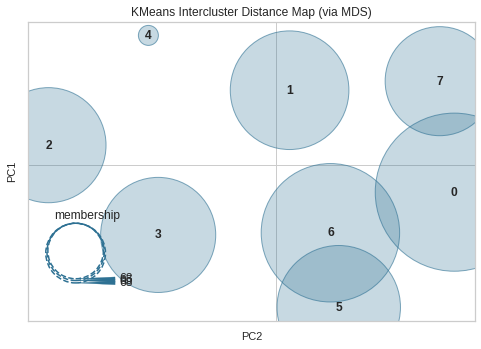

In [63]:
# Inter cluster distance map
from yellowbrick.cluster import InterclusterDistance
# Instantiate the clustering model and visualizer
visualizer = InterclusterDistance(kmeans_1)
visualizer.fit(df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

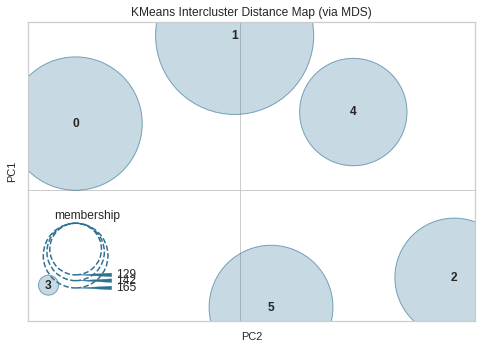

In [64]:
# Inter cluster distance map
from yellowbrick.cluster import InterclusterDistance
# Instantiate the clustering model and visualizer
visualizer = InterclusterDistance(kmeans_2)
visualizer.fit(f)        # Fit the data to the visualizer
visualizer.show()  

GAUSSIAN MIXTURE MODEL EVALUATION

In [35]:
# gaussian mixture clustering
from numpy import unique
from numpy import where
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot
# define the model
model = GaussianMixture(n_components= 9,covariance_type= "full", random_state = 10)
# fit the model
model.fit(bert_encodings)
# assign a cluster to each example
yhat = model.predict(bert_encodings)
# retrieve unique clusters
clusters = unique(yhat)
# Calculate cluster validation score
score_dbsacn_s = silhouette_score(bert_encodings, yhat, metric='euclidean')
score_dbsacn_c = calinski_harabasz_score(bert_encodings, yhat)
score_dbsacn_d = davies_bouldin_score(bert_encodings, yhat)
print('Silhouette Score: %.4f' % score_dbsacn_s)
print('Calinski Harabasz Score: %.4f' % score_dbsacn_c)
print('Davies Bouldin Score: %.4f' % score_dbsacn_d)

Silhouette Score: 0.0554
Calinski Harabasz Score: 21.6489
Davies Bouldin Score: 3.1182


In [65]:
# gaussian mixture clustering
from numpy import unique
from numpy import where
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot
# define the model
model = GaussianMixture(n_components= 7,covariance_type= "full", random_state = 10)
# fit the model
model.fit(bert_encodings1)
# assign a cluster to each example
yhat = model.predict(bert_encodings1)
# retrieve unique clusters
clusters = unique(yhat)
# Calculate cluster validation score
score_dbsacn_s = silhouette_score(bert_encodings1, yhat, metric='euclidean')
score_dbsacn_c = calinski_harabasz_score(bert_encodings1, yhat)
score_dbsacn_d = davies_bouldin_score(bert_encodings1, yhat)
print('Silhouette Score: %.4f' % score_dbsacn_s)
print('Calinski Harabasz Score: %.4f' % score_dbsacn_c)
print('Davies Bouldin Score: %.4f' % score_dbsacn_d)

Silhouette Score: 0.0538
Calinski Harabasz Score: 39.9263
Davies Bouldin Score: 3.0221


AGGLOMERATIVE CLUSTERING EVALUATION

In [66]:
# Agglomerative clustering
from numpy import unique
from numpy import where
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot
# define the model
model = AgglomerativeClustering(n_clusters=9)
# fit model and predict clusters
yhat = model.fit(bert_encodings)
yhat_2 = model.fit_predict(bert_encodings)
# retrieve unique clusters
clusters = unique(yhat)
# Calculate cluster validation metrics
score_AGclustering_s = silhouette_score(bert_encodings, yhat.labels_, metric='euclidean')
score_AGclustering_c = calinski_harabasz_score(bert_encodings, yhat.labels_)
score_AGclustering_d = davies_bouldin_score(bert_encodings, yhat_2)
print('Silhouette Score: %.4f' % score_AGclustering_s)
print('Calinski Harabasz Score: %.4f' % score_AGclustering_c)
print('Davies Bouldin Score: %.4f' % score_AGclustering_d)

Silhouette Score: 0.0563
Calinski Harabasz Score: 19.9324
Davies Bouldin Score: 3.1548


In [67]:
# Agglomerative clustering
from numpy import unique
from numpy import where
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot
# define the model
model = AgglomerativeClustering(n_clusters=9)
# fit model and predict clusters
yhat = model.fit(bert_encodings1)
yhat_2 = model.fit_predict(bert_encodings1)
# retrieve unique clusters
clusters = unique(yhat)
# Calculate cluster validation metrics
score_AGclustering_s = silhouette_score(bert_encodings1, yhat.labels_, metric='euclidean')
score_AGclustering_c = calinski_harabasz_score(bert_encodings1, yhat.labels_)
score_AGclustering_d = davies_bouldin_score(bert_encodings1, yhat_2)
print('Silhouette Score: %.4f' % score_AGclustering_s)
print('Calinski Harabasz Score: %.4f' % score_AGclustering_c)
print('Davies Bouldin Score: %.4f' % score_AGclustering_d)

Silhouette Score: 0.0359
Calinski Harabasz Score: 32.0871
Davies Bouldin Score: 3.0444


**DBSCAN ALGORITHM EVALUATION** 

In [70]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
neighbors = NearestNeighbors(n_neighbors=550)
neighbors1 = NearestNeighbors(n_neighbors=550)
neighbors_fit = neighbors.fit(bert_encodings)
distances, indices = neighbors_fit.kneighbors(bert_encodings)
neighbors1_fit = neighbors1.fit(bert_encodings1)
distances1, indices1 = neighbors_fit.kneighbors(bert_encodings1)

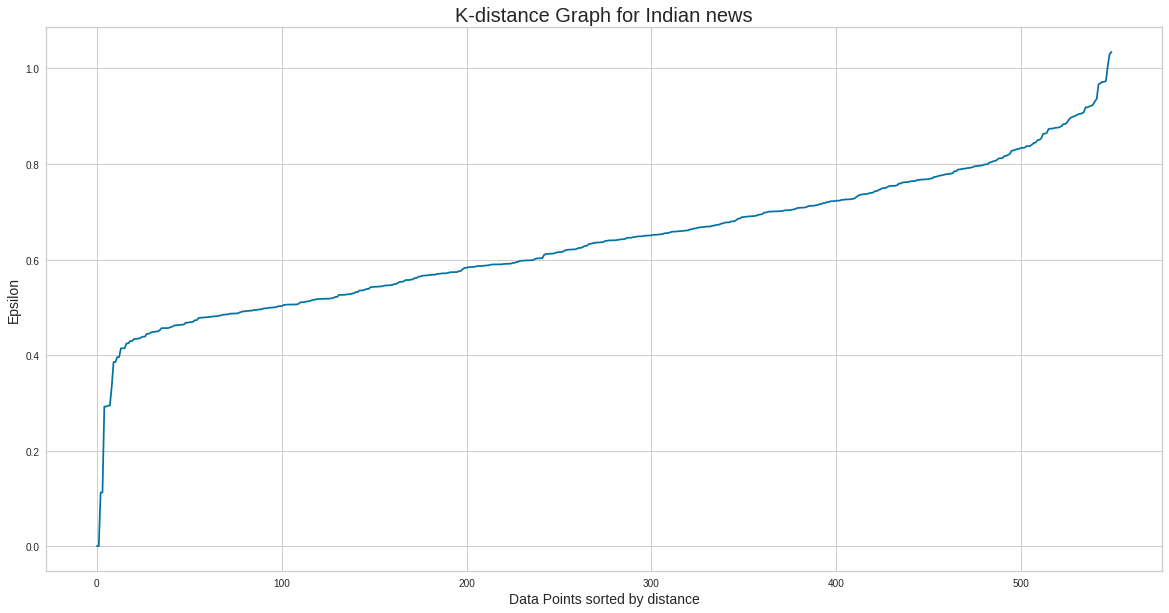

In [72]:
import numpy as np
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph for Indian news',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

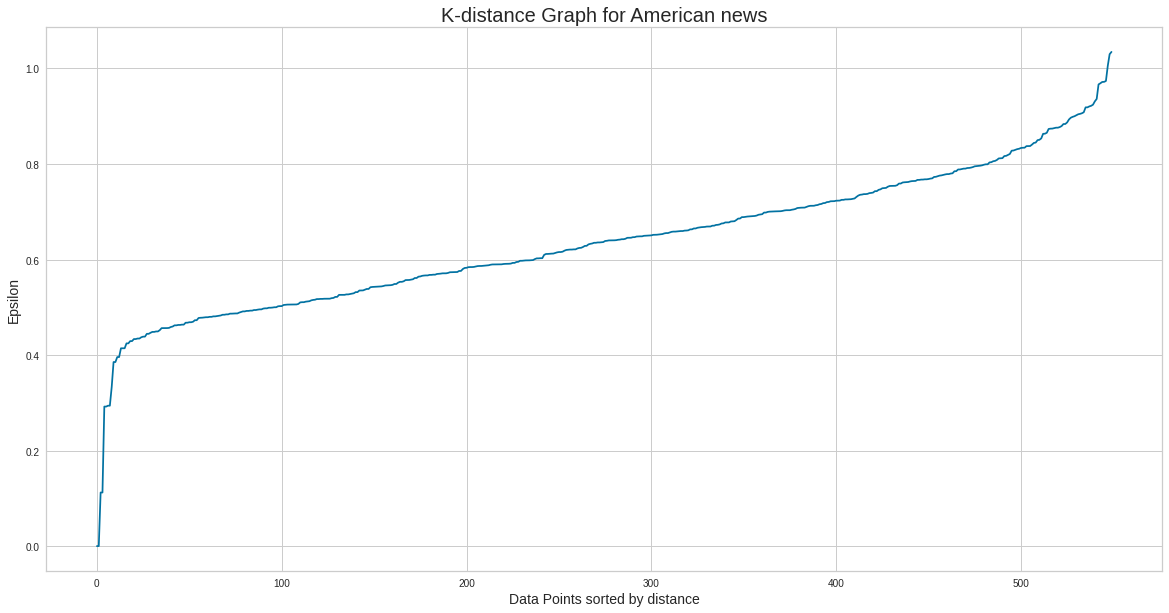

In [73]:
distances1 = np.sort(distances1, axis=0)
distances1 = distances1[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph for American news',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [74]:
# dbscan clustering
from numpy import unique
from numpy import where
from sklearn.cluster import DBSCAN
from matplotlib import pyplot
# define dataset
# define the model
model = DBSCAN(eps=0.42, min_samples= 3)
# rule of thumb for min_samples: 2*len(cluster_df.columns)
# fit model and predict clusters
yhat = model.fit_predict(bert_encodings)
# retrieve unique clusters
clusters = unique(yhat)
# Calculate cluster validation metrics
score_dbsacn_s = silhouette_score(bert_encodings, yhat, metric='euclidean')
score_dbsacn_c = calinski_harabasz_score(bert_encodings, yhat)
score_dbsacn_d = davies_bouldin_score(bert_encodings, yhat)
print('Silhouette Score: %.4f' % score_dbsacn_s)
print('Calinski Harabasz Score: %.4f' % score_dbsacn_c)
print('Davies Bouldin Score: %.4f' % score_dbsacn_d)

Silhouette Score: 0.0248
Calinski Harabasz Score: 3.8568
Davies Bouldin Score: 1.3265


In [75]:
# dbscan clustering
from numpy import unique
from numpy import where
from sklearn.cluster import DBSCAN
from matplotlib import pyplot
# define dataset
# define the model
model = DBSCAN(eps=0.43, min_samples= 3)
# rule of thumb for min_samples: 2*len(cluster_df.columns)
# fit model and predict clusters
yhat = model.fit_predict(bert_encodings1)
# retrieve unique clusters
clusters = unique(yhat)
# Calculate cluster validation metrics
score_dbsacn_s = silhouette_score(bert_encodings1, yhat, metric='euclidean')
score_dbsacn_c = calinski_harabasz_score(bert_encodings1, yhat)
score_dbsacn_d = davies_bouldin_score(bert_encodings1, yhat)
print('Silhouette Score: %.4f' % score_dbsacn_s)
print('Calinski Harabasz Score: %.4f' % score_dbsacn_c)
print('Davies Bouldin Score: %.4f' % score_dbsacn_d)

Silhouette Score: -0.1445
Calinski Harabasz Score: 6.7541
Davies Bouldin Score: 2.0120
